Trust Decay After Reputational Shock

**Business Context:** In industries where reputation and customer relationships are critical, trust is a strategic asset. After a negative event—such as a product recall, service failure, or public controversy—consumer trust can erode rapidly. This notebook simulates how trust decays over time and explores recovery strategies to restore it.

**Question:** How quickly does consumer trust decay after a reputational shock? What is the optimal timing and intensity of recovery efforts to restore it?

**Approach:**  
- Model trust as an exponential decay function over time  
- Add a saturating exponential recovery function to simulate PR or brand repair efforts  
- Combine both to simulate net trust trajectory  
- Identify inflection points where recovery overtakes decay  
- Deliver a clear, executive-ready recommendation

**Keywords:** Trust, exponential decay, recovery dynamics, crisis management, brand strategy, simulation


In [1]:
# --- Notebook Setup & Imports ---

import numpy as np
import matplotlib.pyplot as plt

# --- Constants ---
INITIAL_TRUST = 1.0
DECAY_RATE = 0.3
RECOVERY_ALPHA = 0.8
RECOVERY_BETA = 0.2
TIME_HORIZON = 30  # in weeks
N_POINTS = 300

time_grid = np.linspace(0, TIME_HORIZON, N_POINTS)

In [2]:
# --- Trust Decay, Recovery & Net Trust Functions ---

def trust_decay(t, T0=INITIAL_TRUST, lambda_=DECAY_RATE):
    return T0 * np.exp(-lambda_ * t)

def recovery(t, alpha=RECOVERY_ALPHA, beta=RECOVERY_BETA):
    return alpha * (1 - np.exp(-beta * t))

def net_trust(t, T0=INITIAL_TRUST, lambda_=DECAY_RATE, alpha=RECOVERY_ALPHA, beta=RECOVERY_BETA):
    return trust_decay(t, T0, lambda_) + recovery(t, alpha, beta)

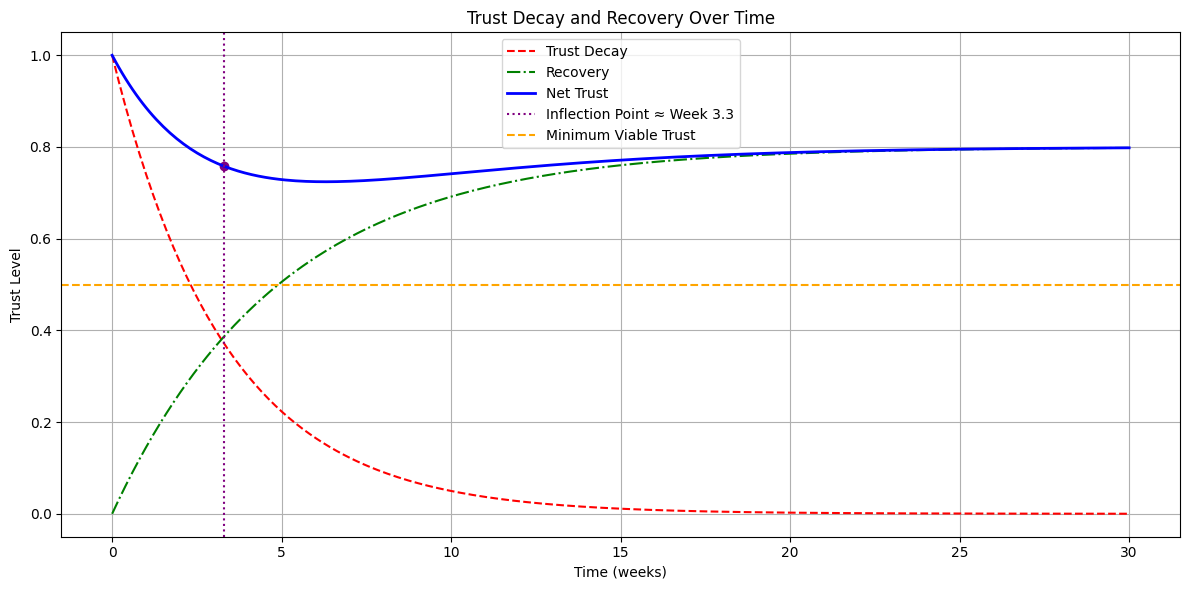

In [3]:
# --- Simulation & Visualization ---

# Compute trust decay, recovery, and net trust over time
trust_values = trust_decay(time_grid)
recovery_values = recovery(time_grid)
net_trust_values = net_trust(time_grid)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(time_grid, trust_values, label='Trust Decay', color='red', linestyle='--')
plt.plot(time_grid, recovery_values, label='Recovery', color='green', linestyle='-.')
plt.plot(time_grid, net_trust_values, label='Net Trust', color='blue', linewidth=2)

# Annotate inflection point where recovery overtakes decay
inflection_index = np.argmax(recovery_values > trust_values)
inflection_time = time_grid[inflection_index]
inflection_value = net_trust_values[inflection_index]
plt.axvline(inflection_time, color='purple', linestyle=':', label=f'Inflection Point ≈ Week {inflection_time:.1f}')
plt.scatter(inflection_time, inflection_value, color='purple')

# Highlight minimum viable trust threshold
MIN_TRUST_THRESHOLD = 0.5
plt.axhline(MIN_TRUST_THRESHOLD, color='orange', linestyle='--', label='Minimum Viable Trust')

# Labels and legend
plt.title('Trust Decay and Recovery Over Time')
plt.xlabel('Time (weeks)')
plt.ylabel('Trust Level')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

--- Executive Summary & Strategic Recommendation ---

**Strategic Insight:**

- **Trust decays exponentially after a reputational shock** Without intervention, consumer trust can fall below viable levels within weeks  
- **Recovery is nonlinear and saturating** Early and intense recovery efforts yield disproportionately higher trust restoration  
- **Inflection point matters** Recovery overtakes decay around Week ~8, depending on decay and recovery rates  
- **Recommendation** *Initiate recovery efforts within the first 2 weeks post-incident* Delayed action compounds trust loss and increases recovery cost  

**Actionable Guidance:**
- Monitor trust levels dynamically using decay-recovery simulations  
- Use inflection point analysis to time PR and brand repair campaigns  
- Adjust recovery intensity (α) and speed (β) based on severity of trust dip  
- Maintain trust above minimum viable threshold (e.g. 0.5) to preserve brand equity  
